In [13]:
import pickle
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import  functools
import math
import numpy as np
import os
from decimal import Decimal
from collections import OrderedDict
from sklearn.metrics import mean_squared_error
from scipy.stats import chisquare
import subprocess as sp

In [14]:
import operator as op
def nCr(n,r):
    f = math.factorial
    return Decimal(f(n)) / (Decimal(f(r)) * Decimal(f(n-r)))

def calculatep(N,k,pi):
    return nCr(N-1,k)*Decimal(pow(pi,k))*Decimal(pow(1-pi,N-1-k))


def setplot(plt):
   
    ax = plt.subplot(111) 

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def excecuteCommand(command):
    command=command.split()
    process = sp.Popen(command, stdout=sp.PIPE, stderr=sp.PIPE)
    stdout, stderr = process.communicate()
    print(stdout,stderr,"ok")
    return

In [2]:
target="Com"
G=pickle.load(open('{}/Graph.pickle'.format(target),"rb"))
waveMatrix=pickle.load(open('{}/waveMatrix.pickle'.format(target),"rb"))
skip=pickle.load(open('{}/skip.pickle'.format(target),"rb"))
nodeNames=pickle.load(open('{}/Correlations/o3/2017/nodeNames.pickle'.format(target),"rb"))

networkDetails=open('{}/CorrelationSummary/networkfeautures.csv'.format(target),'r').readline().strip().split(',')

try:
    cluster=pickle.load(open('{}/cluster.pickle'.format(target),'rb'))
    degree=pickle.load(open('{}/degree.pickle'.format(target),'rb'))
except:
    cluster=nx.clustering(G,weight='weight')
    degree=nx.degree(G,weight='weight')
    pickle.dump(cluster,open('{}/cluster.pickle'.format(target),'wb'))
    pickle.dump(degree,open('{}/degree.pickle'.format(target),'wb'))
    
kmean=float(networkDetails[3])
pi=float(networkDetails[-2])
N=len(degree)
Cavg=float(networkDetails[-1])

62.3333333333 0.403460408769
10


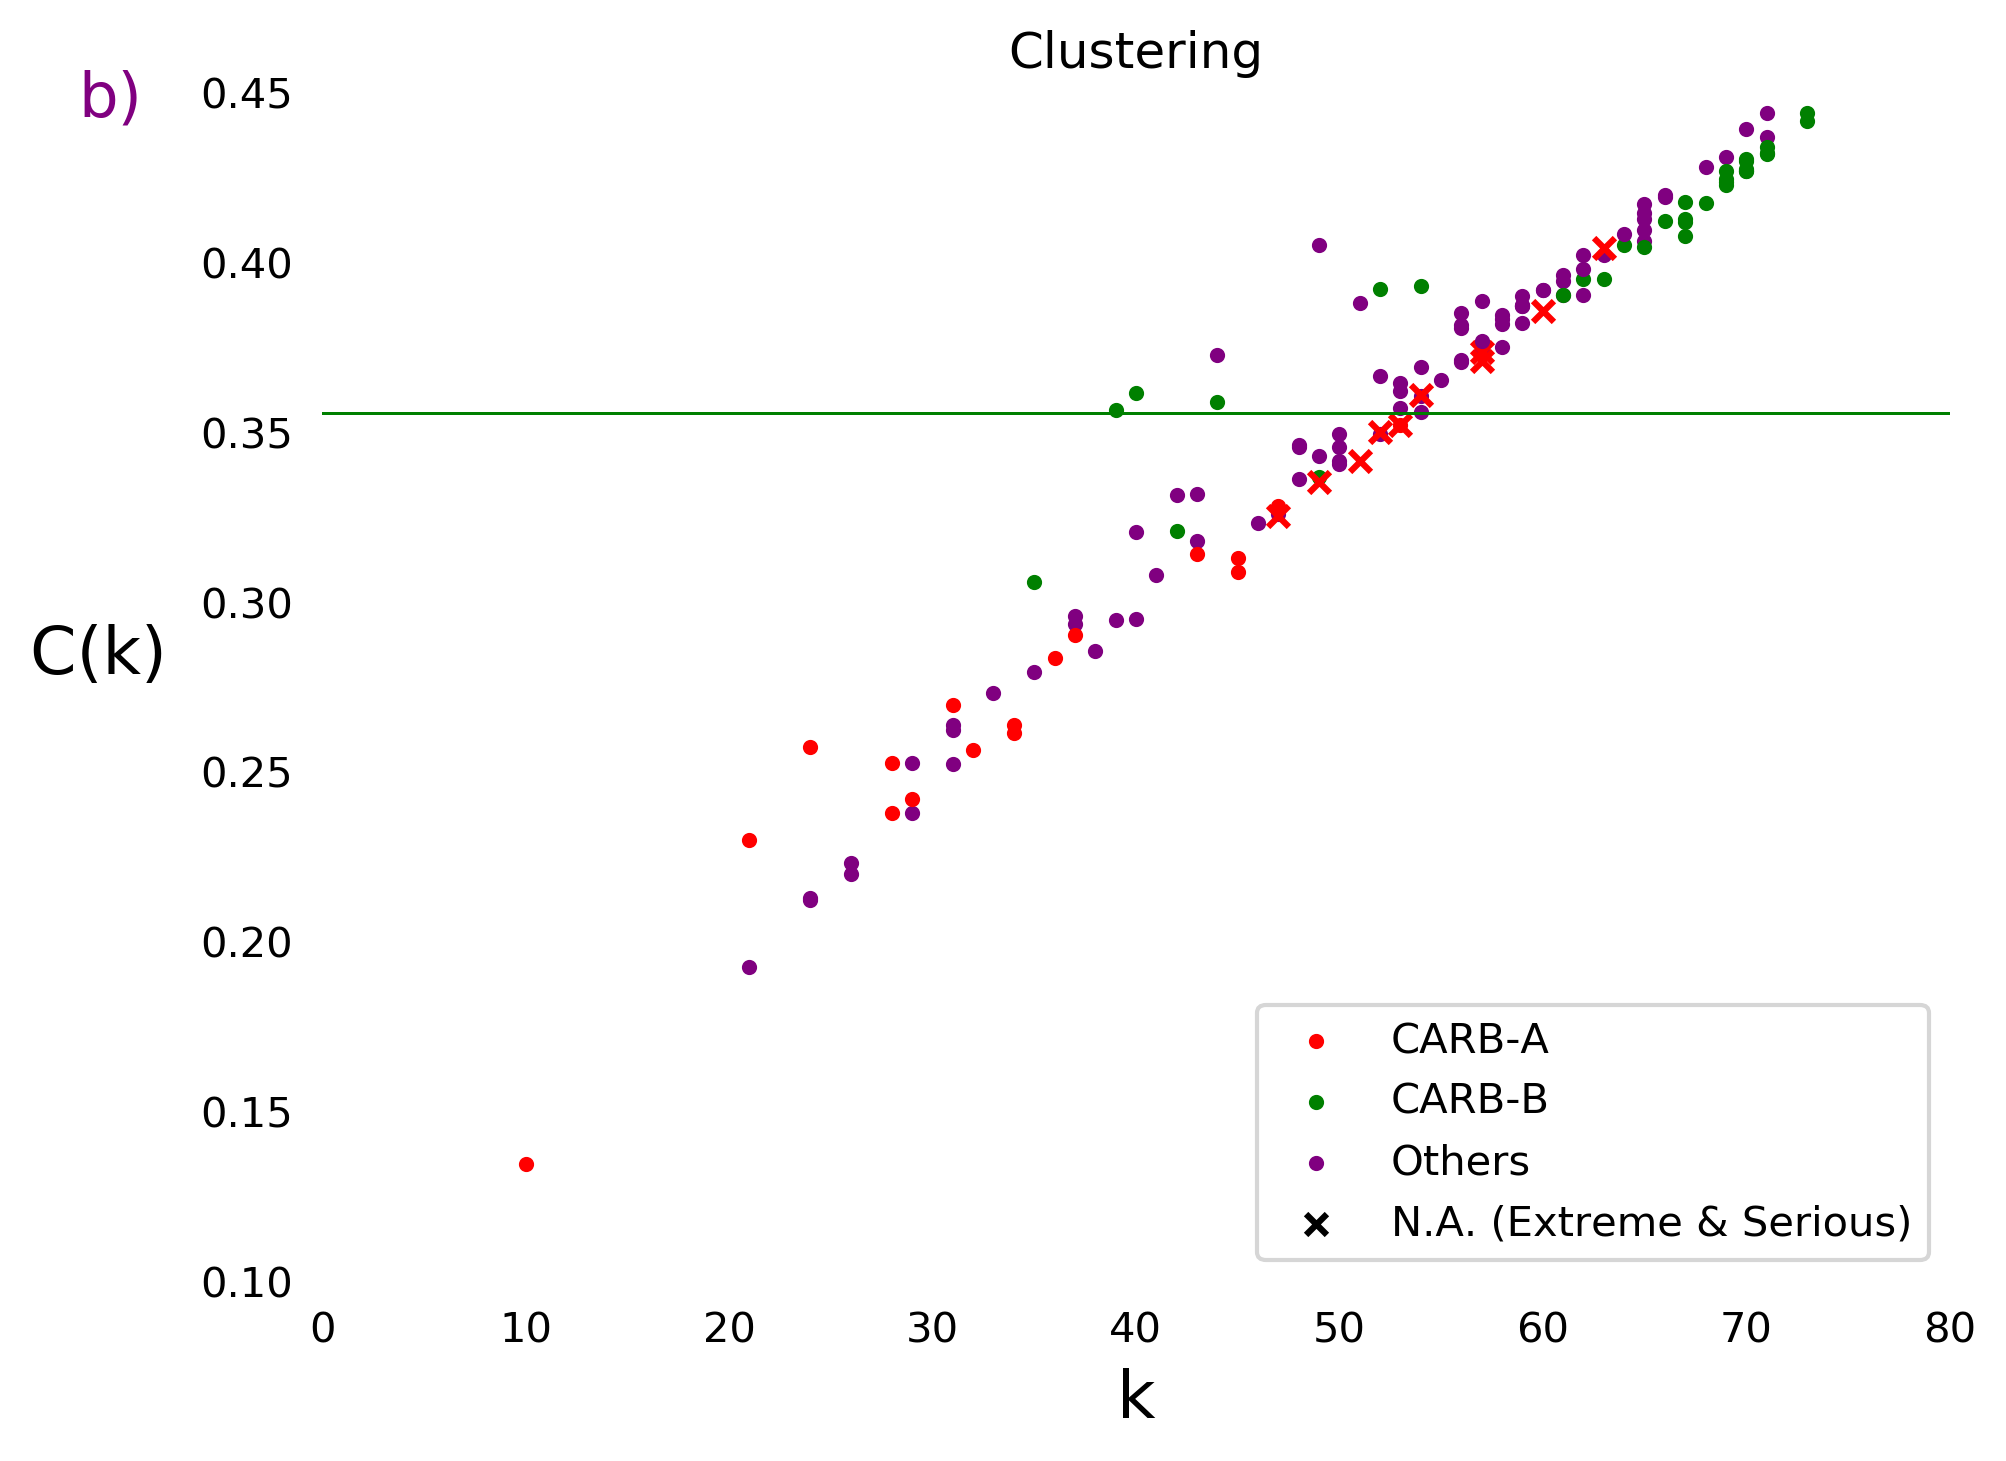

In [47]:
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]

commonNA=pickle.load(open("NA/commonNA-ES.pickle",'rb'))
NA=pickle.load(open("NA/NA.pickle","rb"))

label=['Serious','Extreme']
#NACode=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in commonNA if NA[i].split('-')[0] in label]
NACode=[]
for NAs in commonNA:
    for county in NA[NAs]:
        i=county[-1]
        NACode.append(str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])))

plt.close()
plt.figure(figsize=(7, 5.25),dpi=300)    
plt,ax=setplot(plt)
ax.text(-0.15, 0.98, 'b)', transform=ax.transAxes, size=15,color='purple')

N=len(degree)
count=0
kmean,cmean=[],[]

for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    #p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,100,color='g',linewidth=0.3)
    state=int(county.split('-')[0])
    countyName=int(county.split('-')[1])    
    if state in carbA:
      
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(k,cc,s=25,marker='x',color='red')
            count+=1
        else:
            plt.scatter(k,cc,color='red',s=7)
            
    elif state in carbB:
        kmean.append(k)
        cmean.append(cc)
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(k,cc,s=25,marker='x',color='green')
            count+=1
        else:
            plt.scatter(k,cc,color='green',s=7)
    else:
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(k,cc,s=25,marker='x',color='purple')
            count+=1
        else:
            plt.scatter(k,cc,color='purple',s=7)

# labels

print(np.mean(kmean),np.mean(cmean))

plt.scatter(-1,-1,color='red',s=7,label='CARB-A')
plt.scatter(-1,-1,color='green',s=7,label='CARB-B')
plt.scatter(-1,-1,color='purple',s=7,label='Others')
plt.scatter(-1,-1,s=25,marker='x',color='k',label='N.A. (Extreme & Serious)')  

plt.legend(loc='lower right')
    
plt.xlim(0,80)
plt.ylim(0.10,0.45)
print(count)
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
plt.title('Clustering')
plt.savefig("Com/images/communityClustering2.png",bbox_inches='tight')
plt.show()

In [7]:
NA

{'Allegan County, MI': [('Allegan County', 'Marginal', '26/005')],
 'Amador County, CA': [('Amador County', 'Marginal', '06/005')],
 'Atlanta, GA': [('Bartow County', 'Marginal', '13/015'),
  ('Clayton County', 'Marginal', '13/063'),
  ('Cobb County', 'Marginal', '13/067'),
  ('DeKalb County', 'Marginal', '13/089'),
  ('Fulton County', 'Marginal', '13/121'),
  ('Gwinnett County', 'Marginal', '13/135'),
  ('Henry County', 'Marginal', '13/151')],
 'Baltimore, MD': [('Anne Arundel County', 'Marginal', '24/003'),
  ('Baltimore County', 'Marginal', '24/005'),
  ('Baltimore city', 'Marginal', '24/510'),
  ('Carroll County', 'Marginal', '24/013'),
  ('Harford County', 'Marginal', '24/025'),
  ('Howard County', 'Marginal', '24/027')],
 'Berrien County, MI': [('Berrien County', 'Marginal', '26/021')],
 'Butte County, CA': [('Butte County', 'Marginal', '06/007')],
 'Calaveras County, CA': [('Calaveras County', 'Marginal', '06/009')],
 'Chicago, IL-IN-WI': [('Cook County', 'Marginal', '17/031'),
